<a href="https://colab.research.google.com/github/Myllena-Oliveira/Data_Science/blob/main/AV2_Problema_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### **Adult income dataset**<br>
<br>

---

<br>


Este conjunto de dados reune dados associadas à renda anual de um indivíduo, retiradas de censo estadunidense. Mais informações sobre o dataset e a reunião dos dados podem ser encontradas [aqui](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).<br><br>
O download foi através do [Kaggle](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset).
<br><br>
O intuito deste trabalho é analisar os vários fatores que influenciam na renda anual de um indivíduo e estudar qual o melhor modelo de classificação prevê o nível de renda com base nas informações individuais.
<br><br>
<br>

---

<br>

## **Importações iniciais**

In [45]:
# Importação de pacotes básicos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


# Leitura dos dados

dados = pd.read_csv('/content/adult.csv')

## **Análise exploratória e primeiras manipulações**

In [46]:
# Observando as primeiras linhas do dataset para avaliar a importação

dados.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


####Dados faltantes

Podemos observar que os dados faltantes do dataset estão preenchidos com `?`. Tal ocorrência vai requerer uma etapa extra de tratamento antes da geração do modelo.

In [47]:
# Observando algumas informações preliminares sobre o dataset

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [48]:
# Observando algumas informações preliminares sobre o dataset

dados.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Podemos observar que precisaremos padronizar os dados numéricos, pois há grandes variações nas dimensões das variaveis medidas.

In [49]:
# Observando algumas informações preliminares sobre o dataset -- filtrando dtype: object

dados.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


As próximas etapas compreendem a substuição de caracteres `?` por NaNs, para representar dados faltantes e facilitar o processo de remoção das observações incompletas. A recontagem dos valores de `0` e `1` ajuda a entender como o *drop* afeta o dataset como um todo.

In [50]:
# Substituindo os dados faltantes que estavam marcados com ?

dados.replace('?',np.nan, inplace=True)

In [51]:
dados.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [52]:
# Removendo as linhas com informações faltantes

dados = dados.dropna(axis=0)

####Balanceamento do dataset

É importante notar que, de acordo com as observações a seguir, o target se apresenta na forma de variável categórica que pode assumir dois valores. Após a conversão em variável numérica, um deles, na forma de `0` ou `<=50k`, é muito mais presente -- esse é um comportamento típico de amostras aleatórias de renda.


In [53]:
# Observando a distribuição da variável alvo

dados.income.unique()

array(['<=50K', '>50K'], dtype=object)

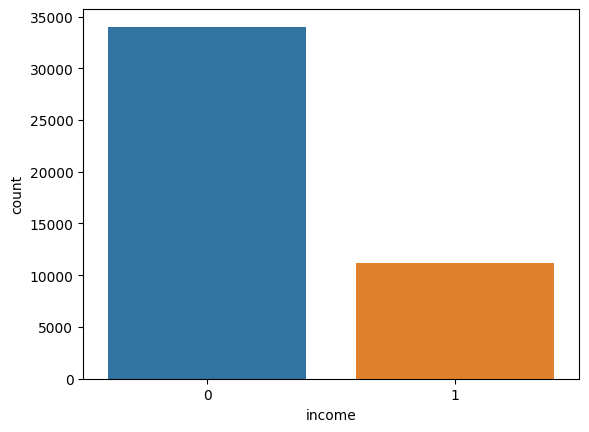

In [54]:
# Realizando o encoding das variáveis

dados.income= dados.income.replace(['<=50K','>50K'],[0,1])

sns.countplot(x=dados["income"]);

In [55]:
# Observando a distribuição da variável alvo

dados["income"].value_counts(normalize=True)

0    0.752156
1    0.247844
Name: income, dtype: float64

In [56]:
# Verificando se a proporção entre as categorias na variável alvo foi muito alterada

dados.value_counts(normalize=True)

age  workclass         fnlwgt  education     educational-num  marital-status      occupation       relationship   race   gender  capital-gain  capital-loss  hours-per-week  native-country  income
21   Private           243368  Preschool     1                Never-married       Farming-fishing  Not-in-family  White  Male    0             0             50              Mexico          0         0.000066
25   Private           308144  Bachelors     13               Never-married       Craft-repair     Not-in-family  White  Male    0             0             40              Mexico          0         0.000066
                       195994  1st-4th       2                Never-married       Priv-house-serv  Not-in-family  White  Female  0             0             40              Guatemala       0         0.000066
22   Private           137876  Some-college  10               Never-married       Protective-serv  Not-in-family  White  Male    0             0             20              United-

>Nota: datasets desbalanceados *podem* gerar problemas no treinamento de modelos. Existem técnicas para lidar com esse problema como over e under-sampling, resampling com proporções diferentes etc.

> Para fortalecer um pouco mais a familiaridade com o dataset, a sumarização dos dados através de um `pairplot` do Seaborn pode condensar as relações entre os dados em uma figura.

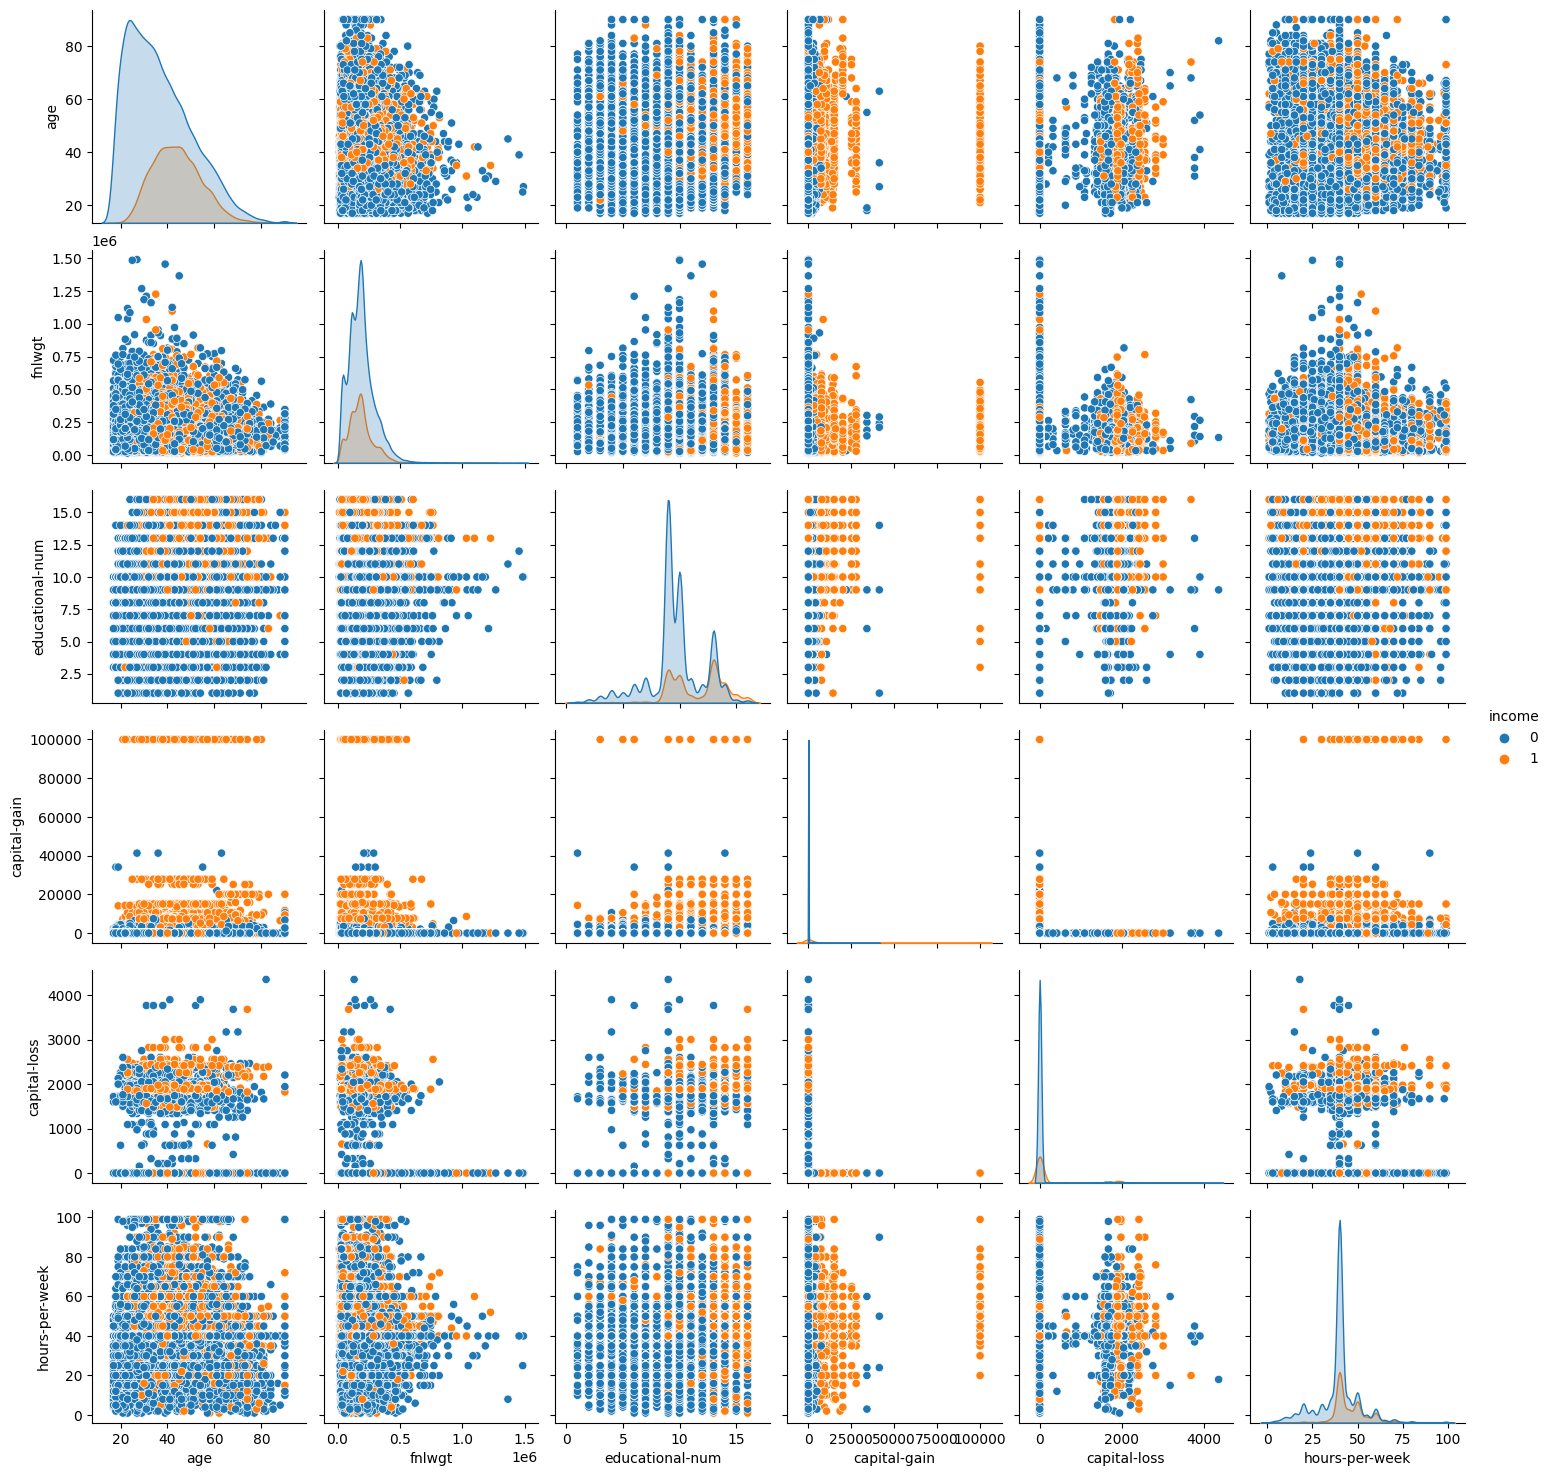

In [57]:
# Visualizando a distribuição da variável alvo com relação às outras variáveis

sns.pairplot(dados, hue='income')

>Um `heatmap` ajuda a visualizar a correlação entre as variáveis. É possível perceber que existe correlação entre o target, `income`, e as demais variáveis, com valores que não parecem levantar preocupações.
<br><br>
>A variável fnlwgt chama atenção pela sua baixa correlação com os as outras variáveis, inclusive com a variável alvo. Essa variável atribui um peso para cada linha e é comum em pesquisas tipo censo para facilitar agrupamentos e médias. Para nossa modelagem, podemos remover ela.
<br><br>
>Além disso, podemos perceber que as features têm baixa correlação entre si e aparentemente apresentam alguma correlação com a variável alvo. Dessa forma, nosso modelo pode ter boas chances de explicar/estimar o `income`

<ipython-input-58-9d5a11d2a4ab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(),annot=True)


<Axes: >

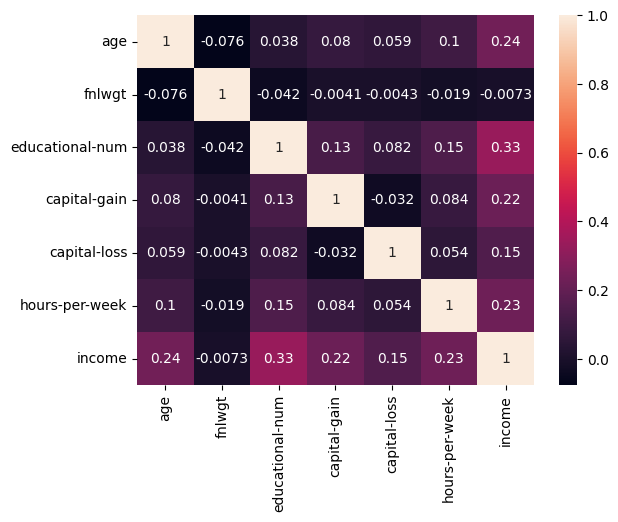

In [58]:
# Visualizando a correlação das variáveis

sns.heatmap(dados.corr(),annot=True)

> A técnica para o balacemaneto dos dados escolhida foi o `Undersampling`, pois remove, de forma aleatória, exemplos da classe marjoritária para equilibrar as proporções. Esse método é bastante útil quando há um grande desequilíbrio nos dados.

In [59]:
# Separar features e rótulos

features = dados.drop('income', axis=1)
labels = dados['income']

In [60]:
# Separar exemplos da classe majoritária e minoritária

majority_data = features[labels == 0]
minority_data = features[labels == 1]

In [61]:
# Aplicar o Random Undersampling na classe majoritária

undersampled_majority_data = resample(majority_data, replace=False, n_samples=len(minority_data), random_state=42)

In [62]:
# Combinação dos dados balanceados

undersampled_data = pd.concat([undersampled_majority_data, minority_data])
undersampled_labels = pd.concat([pd.Series([0] * len(undersampled_majority_data)), pd.Series([1] * len(minority_data))])

In [63]:
# Observando a distribuição da variável alvo após a aplicação do Undersampling

undersampled_labels.value_counts(normalize=True)

0    0.5
1    0.5
dtype: float64

In [64]:
# Contagem dos dados após o balanceamento

# Antes do undersampling
value_counts_original = labels.value_counts()
print("Antes do undersampling:")
print(value_counts_original)


# Após o undersampling
value_counts_undersampled = undersampled_labels.value_counts()
print("Após o undersampling:")
print(value_counts_undersampled)


Antes do undersampling:
0    34014
1    11208
Name: income, dtype: int64
Após o undersampling:
0    11208
1    11208
dtype: int64


####Técnicas de conversão

> Para converter as variáveis categóricas em variáveis numéricas, a função `pd.get_dummies()` é utilizada para codificar as features previamente identificas em etapa anterior:
>>
* `workclass`
* `education`
* `marital-status`
* `occupation`
* `relationship`
* `race`
* `gender`
* `native-country`<br>
>
> O parâmetro `drop_first=True` remove o primeiro nível de cada conjunto de dummies criado, para desfavorecer a ocorrência da [Dummy Variable Trap](https://www.learndatasci.com/glossary/dummy-variable-trap/) -- quando duas ou mais variáveis dummy criadas acabam apresentando alta correlação (multicolinearidade).

<br>

É importante lembrar que a conversão das variáveis categóricas aumenta consideravelmente o número de features no dataset utilizado!


In [65]:
# Gerando dummies para as variáveis categóricas

undersampled_data_encoded = pd.get_dummies(undersampled_data)

In [66]:
# Verificando se todos os dados estão na forma numérica

undersampled_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22416 entries, 40168 to 48841
Columns: 103 entries, age to native-country_Yugoslavia
dtypes: int64(6), uint8(97)
memory usage: 3.3 MB


## **Problema**

> A determinação do tipo de modelo começa com a identificação do problema que requer solução:<br><br>
Dado um conjunto de dados que caracterizam um perfil socioeconômico, em qual dos grupos a renda anual do sujeito tende a estar -- no que ganha mais de 50.000,00 USD ou o grupo que ganha menos (ou até) esse valor.`<br><br>
A partir de uma análise crítica, nos revela que este é um problema de **classificação**, dada a manipulação de dados rotulados e um target discreto, abordado com métodos de aprendizagem supervisionada.<br>

> Para a resolução desse problema, optou-se pela adoção de dois modelos diferentes:<br><br>
* O [K Nearest Neighbors, ou KNN](https://www.youtube.com/watch?v=HVXime0nQeI), é um modelo de classificação simples que agrupa dados com base no cálculo de distâncias. O modelo funciona calculando as distâncias (podem ser utilizadas várias medidas de distância) de cada observação e utilizando essa medida para agregar cada observação numa categoria.
* A [Árvore de Decisão](https://www.youtube.com/watch?v=_L39rN6gz7Y) é um modelo versátil que tenta gerar uma árvore de decisão a partir do dataset, elegendo variáveis e pesos para seus nós de modo que seja maximizada uma medida de "organização da informação" ou minimizada a entropia (desorganização).

## **Treino, teste e transformação**

> A primeira parte do processo é constituída pela criação de dois DataFrames: `X` representa as observações, sem identificadores (incluindo o target); e `y` é a coleção de targets. <br><br>
Em seguida, são definidos os sets de treino e teste. Como parâmetros, adotou-se `0.2` como a proporção do dataset a ser incluída no set de treino e uma estratificação que respeita a proporção dos valores do target (y).

In [67]:
# Verificar o número de amostras

print("Número de amostras em undersampled_data_encoded:", len(undersampled_data_encoded))
print("Número de amostras em undersampled_labels:", len(undersampled_labels))


Número de amostras em undersampled_data_encoded: 22416
Número de amostras em undersampled_labels: 22416


In [68]:
# Converter variáveis categóricas em one-hot encoding
undersampled_data_encoded = pd.get_dummies(undersampled_data)

# Separando entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(undersampled_data_encoded, undersampled_labels, test_size=0.2, random_state=42)


####Uso do Feature Scaling

> Como podemos observar, é necessário realizar uma transformação dos dados para padronizar as escalas devido às diferentes ordens de grandeza presentes. Abaixo, o `StandarScaler` é utilizado para padronizar, separadamente, os valores de treino e teste de `X`.

In [69]:
''' Aplicando o StandartScaler nas variáveis numéricas
Como recomendado, foi aplicado o scaler de maneira separada nos datasets de treino e teste'''

from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
X_train_std = scaler_train.fit_transform(X_train.select_dtypes(include='number'))

scaler_test = StandardScaler()
X_test_std = scaler_test.fit_transform(X_test.select_dtypes(include='number'))

## **KNN**

> As próximas células compreendem a importação  da função de classificador KNN e sua atribuição a uma variável e o *fit*.

> O numero ideal de `neighbors` definido como parâmetro é contextualizado mais à frente.

> Depois de treinado, o modelo é utilizado no conjunto de teste (padronizado) de `X` e uma avaliação dos resultados obtidos é feita através da comparação com o conjunto de teste das targets previamente separado.

In [70]:
# Importando o modelo que será utilizado (KNN)

from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)

In [71]:
# Treinando o modelo

modelo.fit(X_train_std, y_train)

KNeighborsClassifier()

In [72]:
# Utilizando o modelo treinado para classificar o dataset de teste

y_pred = modelo.predict(X_test_std)

#### Uso da técnica para determinação de k

> Para fazer um protótipo de otimização do hiperparâmetro `k`, é possível rodar o modelo iterativamente variando o valor de `k`, guardando os resultados de f1-score.

In [73]:
from sklearn.metrics import f1_score

# Inicializa a variável que vai acumular os resultados de f1
f1_test = []
f1_train = []

# Rodando um laço treinando e avaliando o modelo com K variando de 1 a 30
for i in range(1,31,2):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_std,y_train)
 pred_test = knn.predict(X_test_std)
 pred_train = knn.predict(X_train_std)
 f1_test.append(f1_score(pred_test, y_test))
 f1_train.append(f1_score(pred_train, y_train))

> Um gráfico pode ser plotado para entender visualmente como essa métrica se comporta.<br>

O score F1 máximo foi: 0.7945265945707349 para um valor de K = 7


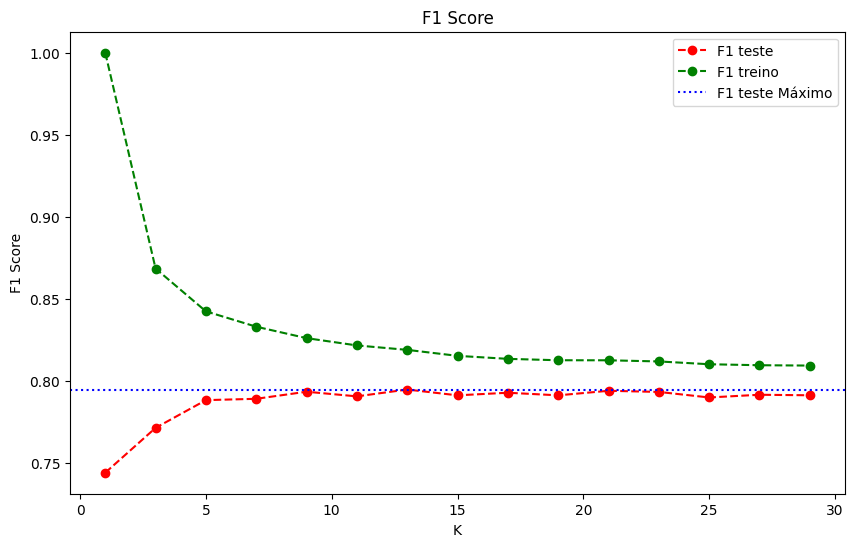

In [74]:
'''Visualizando f1-score acordo com o número de k escolhido
Assim podemos escolher um k que maximize o F1'''

plt.figure(figsize=(10,6))
plt.plot(range(1,31,2),f1_test,color='red', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=6, label = "F1 teste")
plt.plot(range(1,31,2),f1_train,color='green', linestyle='dashed',
         marker='o',markerfacecolor='green', markersize=6, label = "F1 treino")
plt.axhline(y = max(f1_test), color = 'b', linestyle = ':', label = "F1 teste Máximo")
plt.title('F1 Score')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.legend()
print("O score F1 máximo foi:",max(f1_test),"para um valor de K =",f1_test.index(max(f1_test))+1)

> Temos que o valor máximo do f1-score é obtido para `k=7`, dessa forma, esse foi o valor de `k` adotado para treinar o modelo.

####Métrica de Avaliação

> A métrica adotada para a avaliação da performance do modelo será o `f1-score`, pois equilibra a precisão e recall (sensibilidade).

In [75]:
# Gerando um resumo de avaliação do modelo

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      2257
           1       0.78      0.80      0.79      2227

    accuracy                           0.79      4484
   macro avg       0.79      0.79      0.79      4484
weighted avg       0.79      0.79      0.79      4484

0.7880530973451328


## **Árvore de Decisão, Pipeline e Otimização de Hiperparâmetros**

> Agora que um modelo simples foi aplicado, é possível incorporar mais técnicas e um modelo mais complexo para efeitos de comparação e avaliação de performance. Para tal, será utilizada a técnica de gerar um pipeline para aplicar a padronização e treinar um modelo de Árvore de Decisão. O pipeline de operações estruturado será utilizado em conjunto com uma busca aleatória para otimizar alguns hiperparâmetros do modelo e avaliar o resultado final.

> Os hiperparâmetros a serem avaliados são:
* `criterion`: define como o grau de desorganização das informações vai ser calculado
* `max_features`: o número máximo de features que serão utilizadas para o modelo
* `max_depth`: a profundidade máxima das árvores geradas pelo modelo
* `class_weight`: se todas as classes da variável alvo terão o mesmo peso ou se serão balanceadas

> Nota: A sugestão de valores para exploração em *max_features* precisa levar em consideração que, após a conversão dos valores categóricos, o número de colunas passou a ser *96*.

In [76]:
# Construindo o pipeline com o Decision Tree Classifier e otimizando os hiperparâmetros

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# Converter os rótulos de classe em representações numéricas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Criando o pipeline de operações que serão executadas no dataset
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Definindo o grid de hiperparâmetros que serão avaliados
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_features': [20, 30, 40, 50, 60, 70],
    'model__max_depth': [None, 4, 8, 10, 12, 14, 16],
    'model__class_weight': [None, 'balanced']
}


''' Além do pipe, do grid de parâmetros e da seed, o random search recebe ainda os seguintes parâmetros:
    cv : número de 'folds' realizados na crosvalidation
    n_iter: número de iterações de fit de modelo
    n_jobs: número de jobs criados no processo (usado para paralelização)'''
# Gerando o agrupamento de modelos com conjuntos aleatórios de hiperparâmetros de acordo com o grid definido

random_search = RandomizedSearchCV(pipe, param_grid, random_state=42, n_iter=40, cv=5, n_jobs=-1, error_score='raise')
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'model__class_weight': [None,
                                                                'balanced'],
                                        'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [None, 4, 8, 10, 12,
                                                             14, 16],
                                        'model__max_features': [20, 30, 40, 50,
                                                                60, 70]},
                   random_state=42)

> Após gerar o grid de parâmetros, podemos utilizador a busca aleatória para otimizar os hiperparâmetros.

In [77]:
# Buscando os melhores hiperparâmetros

best_params = random_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

Melhores parâmetros encontrados: {'model__max_features': 60, 'model__max_depth': 10, 'model__criterion': 'entropy', 'model__class_weight': 'balanced'}


In [78]:
# Gerando a nova previsão

y_pred = random_search.predict(X_test)

In [79]:
# Visualizando a performance do modelo otimizado

print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2257
           1       0.80      0.82      0.81      2227

    accuracy                           0.81      4484
   macro avg       0.81      0.81      0.81      4484
weighted avg       0.81      0.81      0.81      4484

0.8091332298825094


In [80]:
# Visualizando os melhores hiperparâmetros encontrados na busca

random_search.best_params_

{'model__max_features': 60,
 'model__max_depth': 10,
 'model__criterion': 'entropy',
 'model__class_weight': 'balanced'}

####Conclusão e comparação entre os resultados dos modelos aplicados

> Tanto o KNN quanto a Árvore de Decisão `apresentaram resultados semelhantes` em termos de `f1-score`. Ambos os modelos obtiveram um f1-score de aproximadamente 0.81 tanto no conjunto de teste quanto no conjunto de treinamento. Portanto, `em termos de desempenho geral, não há uma diferença significativa entre os dois modelos com base no f1-score`.

>No entanto, é importante notar que a Árvore de Decisão obteve uma precisão ligeiramente maior para a classe 0 e uma precisão ligeiramente menor para a classe 1 em comparação com o KNN. Por outro lado, o KNN obteve uma precisão ligeiramente maior para a classe 1 e uma precisão ligeiramente menor para a classe 0 em comparação com a Árvore de Decisão.

>Portanto, `se a precisão por classe for um critério importante`, podemos `considerar escolher o modelo com as métricas de precisão mais adequadas para as classes relevantes do problema`. No entanto, se apenas o f1-score geral for levado em consideração, ambos os modelos apresentam resultados semelhantes.